In [2]:
# Import the required libraries
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np   # numpy is used for numerical computing and array operations

# **Loading and analyzing the data**

In [3]:
# Read the CSV file 'mymoviedb.csv' into a DataFrame called 'df'
# Set the lineterminator to '\n' to handle any line termination characters properly
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df['Poster_Url'][0]

'https://image.tmdb.org/t/p/original/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg'

# **We will use a pre-trained model**

In [6]:
# Import TensorFlow library
import tensorflow as tf

# Import TensorFlow Hub library for using pre-trained models
import tensorflow_hub as hub

# Import Matplotlib library for plotting
import matplotlib.pyplot as plt

# Import necessary packages
import os  
import re  

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
# Import scikit-learn modules
from sklearn.metrics.pairwise import cosine_similarity  # For computing cosine similarity between vectors
from sklearn.neighbors import NearestNeighbors  # For implementing k-nearest neighbors algorithm
from sklearn.decomposition import PCA  # For performing Principal Component Analysis (PCA)


# **Loading Pretrained Model**

In [8]:
# Load the pre-trained model from TensorFlow Hub
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print('model loaded')

model loaded


In [9]:
# Define a function named 'embed' that takes a list of 'texts' as input
def embed(texts):
    # Use the pre-trained model to obtain embeddings for the input 'texts'
    # The 'model' variable is assumed to be loaded with a pre-trained model from TensorFlow Hub
    return model(texts)

In [10]:
embed(['Movie is good'])

# 'embeddings' will contain the embeddings of the input text ['Movie is good']

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-2.92219035e-02, -3.14462297e-02,  2.34991722e-02,
         7.36492546e-03,  7.76238069e-02,  3.11416462e-02,
        -8.00172798e-03, -2.30119992e-02,  3.45778018e-02,
         1.31114516e-02,  2.52872892e-02, -1.87290050e-02,
        -7.89124891e-02, -6.50351644e-02, -1.12553835e-02,
        -6.12646155e-03, -9.28147044e-03,  1.98763479e-02,
        -6.66044839e-03, -1.14539694e-02,  5.49483113e-03,
        -1.02121226e-01,  6.78207958e-04,  3.53169627e-02,
         3.58779132e-02,  2.06298716e-02, -1.06511293e-02,
        -6.51499350e-03, -5.93384840e-02,  1.02144502e-01,
        -1.98473632e-02, -3.39227333e-03, -1.39104929e-02,
        -5.76402480e-03,  1.05825560e-02,  6.26210570e-02,
         4.28830413e-03, -5.28215319e-02, -1.39334723e-02,
        -2.68419255e-02,  4.20537926e-02,  3.74216512e-02,
        -1.01836227e-01,  4.89530936e-02,  1.31991040e-02,
         1.06181588e-03,  7.21511841e-02,  7.59368315e-02,
      

In [11]:
# Select only the columns "Title", "Overview", and "Poster_Url" from the DataFrame 'df'
# The DataFrame 'df' is assumed to have columns named "Title", "Overview", and "Poster_Url"
df = df[["Title", "Overview", "Poster_Url"]]

# Display the first few rows of the modified DataFrame 'df'
df.head()

,Title,Overview,Poster_Url
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,The Batman,"In his second year of fighting crime, Batman u...",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,No Exit,Stranded at a rest stop in the mountains durin...,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,Encanto,"The tale of an extraordinary family, the Madri...",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,The King's Man,As a collection of history's worst tyrants and...,https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# **Data Cleaning**

In [12]:
# Check for missing values in each column of the DataFrame 'df'
df.isnull().sum()

Title         0
Overview      0
Poster_Url    0
dtype: int64

In [13]:
# Check for duplicate rows in the DataFrame 'df'
df.duplicated().sum()
has_duplicates = df.duplicated().any()
print(has_duplicates)

False


In [14]:
movies = df

In [15]:
titles=list(movies['Overview'])
titles[:5]

['Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.',
 'In his second year of fighting crime, Batman uncovers corruption in Gotham City that connects to his own family while facing a serial killer known as the Riddler.',
 'Stranded at a rest stop in the mountains during a blizzard, a recovering addict discovers a kidnapped child hidden in a car belonging to one of the people inside the building which sets her on a terrifying struggle to identify who among them is the kidnapper.',
 "The tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibrant town, in a wondrous, charmed place called an Encanto. The magic of the Encanto has blessed every child in the family with a unique gift from super strength to the power to h

# **Embedding**

In [16]:
# Generate embeddings for the list of 'titles' using the 'embed' function
# The 'embed' function is assumed to be defined earlier and capable of generating embeddings from the given input.
embeddings = embed(titles)

# Print the shape of the resulting embeddings
print('The embedding shape is: ', embeddings.shape)

The embedding shape is:  (9827, 512)


# **PCA**

In [17]:
pca=PCA(n_components=2)
emb_2d=pca.fit_transform(embeddings)

# **Scatter Plot**

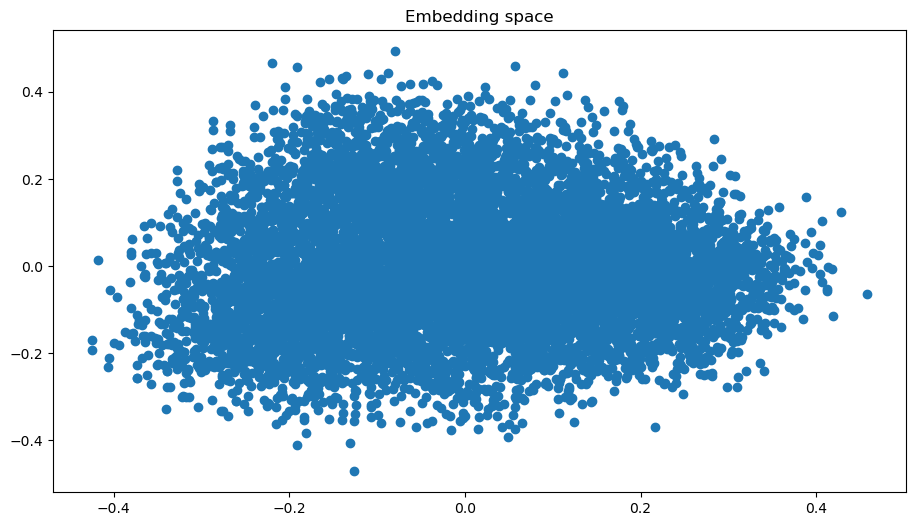

In [18]:
plt.figure(figsize=(11,6))
plt.title("Embedding space")
plt.scatter(emb_2d[:,0],emb_2d[:,1])
plt.show()

# **NearestNeighbours**

In [19]:
from sklearn.neighbors import NearestNeighbors

# Initialize the NearestNeighbors model with 'n_neighbors' set to 10
# The model will find the 10 nearest neighbors for each data point in the 'embeddings' dataset.
nn = NearestNeighbors(n_neighbors=10)

# Fit the NearestNeighbors model with the 'embeddings' dataset
# The model will learn the distances and indices of the 10 nearest neighbors for each data point.
nn.fit(embeddings)


NearestNeighbors(n_neighbors=10)

In [20]:
# Define a function named 'recommend' that takes a 'text' as input
def recommend(text):
    # Generate the embedding for the input 'text' using the 'embed' function
    emb = embed([text])

    # Find the 10 nearest neighbors based on the computed embeddings using the NearestNeighbors model 'nn'
    neighbors = nn.kneighbors(emb, return_distance=False)[0]

    # Print the titles of the recommended movies based on the nearest neighbors
    for i in neighbors:
        print(movies['Title'].iloc[i])


# **Predictions**

In [21]:
print("Recommended Movies:")
recommend('Captain America: Civil War')

Recommended Movies:
Team Thor: Part 1
Iron Man & Captain America: Heroes United
Team Thor: Part 2
Captain America: Civil War
Captain America: The Winter Soldier
Spider-Man: Homecoming
Ant-Man and the Wasp: Quantumania
The Marvels
Marvel Studios: Assembling a Universe
Thor: Love and Thunder


In [22]:
print("Recommended Movies:")
recommend('Batman')

Recommended Movies:
LEGO DC Comics Super Heroes Batman Be-Leaguered
Lego DC Batman: Family Matters
Batman & Robin
Batman Tech
Batman: Bad Blood
Batman: The Dark Knight Returns, Part 1
The Batman vs. Dracula
Batman: Return of the Caped Crusaders
Batman: Mystery of the Batwoman
Batman: The Dark Knight Returns, Part 2


# **Overview what we have done**
1. We start by importing the required libraries, including pandas, numpy, tensorflow, tensorflow_hub, and sklearn.
2. We define functions to load the pre-trained model, generate embeddings for texts, recommend movies based on the input text, and load movie data from a CSV file.
3. In the main() function, we load the movie data, select relevant columns, load the pre-trained model, and generate embeddings for movie overviews using the model.
4. We initialize the NearestNeighbors model, fit it with the embeddings, and get user input for movie recommendation.
5. The recommend_movies function then recommends movies based on the user input using the NearestNeighbors model.
6. The program is executed by calling the main() function.